# Around Black-Scholes

We offer you the following practical task on Black-Scholes model. 

Total score is <span style="color:blue">100</span>, which will be converted to $10\%$ of the course grade. You may also get <span style="color:blue">30</span> extra points as bonuses. You have $3$ weeks for this work. **Soft deadline is 31st of March, 16:45 MSK.** Every $24$ hours during the next week **after** the deadline will give a penalty of $15\%$ of the total score. **Hard deadline is 7th of April, 16:45 MSK**.

The file must be sent to **victorantipov99@gmail.com.** Please rename your file as **"SurnameName_HW1.ipynb"** before sending. 

If you have any questions feel free to ask in Telegram https://t.me/igortao or https://t.me/v_antipov.

#### Full name:
#### Faculty:


In [70]:
%%sh
echo "Installing dependencies..."

# ACHTUNG! Be careful here, installing dependencies via pip can break conda environment!
# If you still don't have these libs, uncomment lines below and run cell or install them manually.

# pip install -U pip
# pip install -U pandas numpy matplotlib scipy ipywidgets

echo "Done!"

Installing dependencies...
Done!


In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sps
from scipy.optimize import root_scalar

from ipywidgets import interact
from ipywidgets import widgets

from dataclasses import dataclass, field
from typing import Union
from copy import deepcopy

## Episode 1: The Price and It's Derivatives (20 points)

Consider prices of call and put options on stocks in Black-Scholes model:
$$C = S\Phi(d_1) - e^{-rT}K\Phi(d_2), \quad P = e^{-rT}K\Phi(-d_2) - S\Phi(-d_1),$$
where
$$
d_1 = \frac1{\sigma \sqrt{T}} \left( \ln \frac{S}{K} + \left( r + \frac{\sigma^2}2 \right) T \right), \quad 
d_2 = \frac1{\sigma \sqrt{T}} \left( \ln \frac{S}{K} + \left( r - \frac{\sigma^2}2 \right) T \right).
$$
Derive formulas for common greeks <span style="color:blue">(5 points)</span>.:
$$
\begin{aligned}
\Delta_c &= \frac{\partial C}{\partial S} =\\
\Delta_p &= \frac{\partial P}{\partial S} =\\
\gamma_c &= \frac{\partial^2 C}{\partial S^2} =\\
\gamma_p &= \frac{\partial^2 P}{\partial S^2} =\\
\theta_c &= -\frac{\partial C}{\partial T} =\\
\theta_p &= -\frac{\partial P}{\partial T} =\\
\nu_c &= \frac{\partial C}{\partial \sigma} =\\
\nu_p &= \frac{\partial P}{\partial \sigma} =\\
\rho_c &= \frac{\partial C}{\partial r} =\\
\rho_p &= \frac{\partial P}{\partial r} =
\end{aligned}
$$

Write functions for option price and greeks <span style="color:blue">(15 points)</span>.

In [72]:
@dataclass
class StockOption:
    strike_price: Union[float, np.ndarray]
    expiration_time: Union[float, np.ndarray]  # in years
    is_call: bool

@dataclass
class CallStockOption(StockOption):
    def __init__(self, strike_price, expiration_time):
        super().__init__(strike_price, expiration_time, True)
        

@dataclass
class PutStockOption(StockOption):
    def __init__(self, strike_price, expiration_time):
        super().__init__(strike_price, expiration_time, False)

In [73]:
@dataclass
class MarketState:
    stock_price: Union[float, np.ndarray]
    volatility: Union[float, np.ndarray]  # sigma, annualized
    interest_rate: Union[float, np.ndarray]  # r, assume constant

In [74]:
# Your code

def price(option: StockOption, state: MarketState) -> Union[float, np.ndarray]:
    # YOUR CODE HERE
    raise NotImplementedError

def delta(option: StockOption, state: MarketState) -> Union[float, np.ndarray]:
    # YOUR CODE HERE
    raise NotImplementedError

def gamma(option: StockOption, state: MarketState) -> Union[float, np.ndarray]:
    # YOUR CODE HERE
    raise NotImplementedError

def theta(option: StockOption, state: MarketState) -> Union[float, np.ndarray]:
    # YOUR CODE HERE
    raise NotImplementedError

def vega(option: StockOption, state: MarketState) -> Union[float, np.ndarray]:
    # YOUR CODE HERE
    raise NotImplementedError

def rho(option: StockOption, state: MarketState) -> Union[float, np.ndarray]:
    # YOUR CODE HERE
    raise NotImplementedError

In [76]:
strikes = np.linspace(50, 150, 50)
times = np.linspace(0, 2, 50)

calls = CallStockOption(strike_price=strikes.reshape(1, -1),
                        expiration_time=times.reshape(-1, 1))
puts = PutStockOption(strike_price=strikes.reshape(1, -1),
                      expiration_time=times.reshape(-1, 1))

In [77]:
market_state = MarketState(stock_price=100,
                           volatility=0.167,
                           interest_rate=0.1)

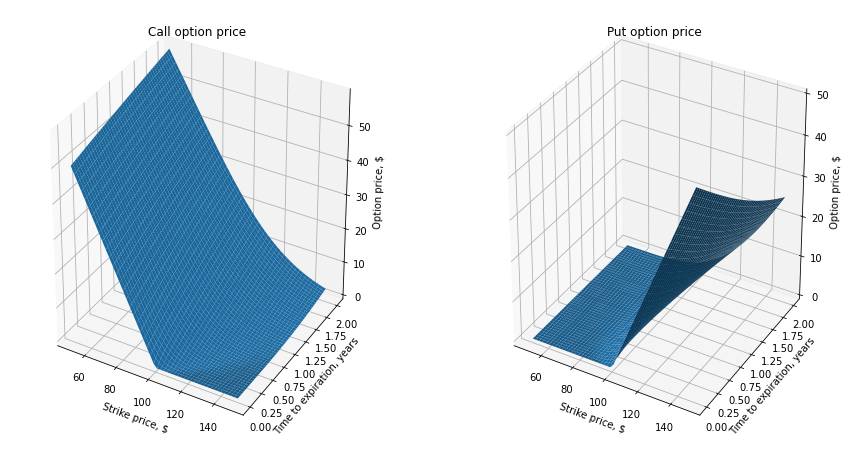

In [78]:
x, y = np.meshgrid(strikes, times)
call_price = price(calls, market_state)
put_price = price(puts, market_state)

fig = plt.figure(figsize=(15, 8))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x, y, call_price)
ax1.set_title('Call option price')
ax1.set_xlabel('Strike price, $')
ax1.set_ylabel('Time to expiration, years')
ax1.set_zlabel('Option price, $')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x, y, put_price)
ax2.set_title('Put option price')
ax2.set_xlabel('Strike price, $')
ax2.set_ylabel('Time to expiration, years')
ax2.set_zlabel('Option price, $')

plt.show()

In [79]:
def plot_all(type_: str = 'Call',
             time_to_expiration: float = 0.25,
             volatility: float = 0.1587,
             stock_price: float = 100.0,
             interest_rate: float = 0.0):
    opt = StockOption(strike_price=np.linspace(20, 200, 100),
                      expiration_time=time_to_expiration,
                      is_call=(type_ == 'Call'))
    state = MarketState(stock_price=stock_price,
                        volatility=volatility,
                        interest_rate=interest_rate)
    
    data = {
        'price': price(opt, state),
        'delta': delta(opt, state),
        'gamma': gamma(opt, state),
        'vega': vega(opt, state),
        'theta': theta(opt, state),
        'rho': rho(opt, state)
    }

    fig, axs = plt.subplots(2, 3, figsize=(20, 10))

    for name, ax in zip(data, axs.flatten()):
        ax.plot(opt.strike_price, data[name])
        ax.set_title(name)
        ax.set_xlabel('Strike price')
        
    plt.show()

In [80]:
interact(plot_all,
         type_=widgets.Dropdown(options=['Call', 'Put'], value='Call', description='Option type'),
         time_to_expiration=widgets.FloatSlider(min=0.01, max=5.0, step=0.01, value=0.25, description='Time to expiration, years'),
         volatility=widgets.FloatSlider(min=0.1, max=2.0, step=0.01, value=0.1587, description='Volatility, annualized'),
         stock_price=widgets.FloatSlider(min=50.0, max=150.0, value=100.0, description='Stock price'),
         interest_rate=widgets.FloatSlider(min=0, max=0.2, step=0.005, value=0.0, description='Interest rate, annualized'));

interactive(children=(Dropdown(description='Option type', options=('Call', 'Put'), value='Call'), FloatSlider(…

## Episode 2: Monte-Carlo Strikes Back (50 points)

**1. Write down SDE for risk-neutral price process in Black-Scholes model and its solution <span style="color:blue">(5 points)</span>:**

$$
\begin{cases}
d S_t = \\
S_{t_0} = S_0
\end{cases} \\
S_t = 
$$

**2. Implement Monte-Carlo option pricing <span style="color:blue">(25 points)</span>**:

In [81]:
# Your code

def simulate_price(time: Union[float, np.ndarray],
                   n_simulations: int,
                   state: MarketState) -> np.ndarray:
    """Simulates price process evaluating it at given time points
        
    Args:
        time (float or np.darray): time point(s) at which the price shoud be evaluated.
        n_simulations (int): number of simulations.
        state (MarketState): initial market stateto start from.
        
    Returns:
        np.ndarray: numpy array of shape (n_simulations, *np.shape(time)) with price.
    """
    
    # YOUR CODE HERE
    
    raise NotImplementedError
    
    
def present_value(time: Union[float, np.ndarray],
                  value: Union[float, np.ndarray],
                  interest_rate: float) -> Union[float, np.ndarray]:
    """Calculates present value of payoff(s) occuread at given time(s)
    
    Args:
        time (float or np.ndarray): time(s) in years at which payoff occured
        value (float or np.ndarray): value(s) of the payoff(s)
        interest_rate (float): continuous annualized constant discount rate
    
    Returns:
        float or np.ndarray: continuously discounted value of the payoff
    """
    # YOUR CODE HERE
    
    raise NotImplementedError

In [84]:
def mc_price(option: StockOption, state: MarketState, n_simulations: int = 10_000) -> Union[float, np.ndarray]:
    price = simulate_price(option.expiration_time, n_simulations, state)
    
    shape = option.strike_price.shape
    if option.is_call:
        payoff = np.maximum(0, price - np.reshape(option.strike_price, (1, *shape)))
    else:
        payoff = np.maximum(0, np.reshape(option.strike_price, (1, *shape)) - price)
        
    return present_value(time=option.expiration_time,
                         value=payoff.mean(0),
                         interest_rate=state.interest_rate)

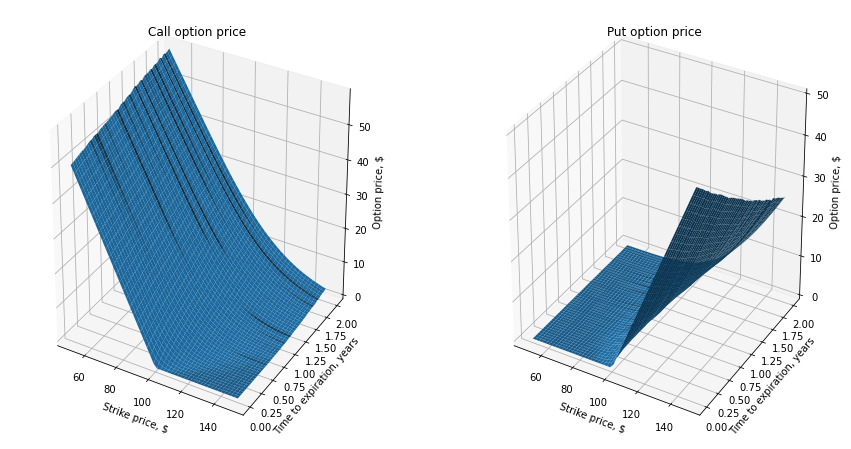

In [85]:
N_SIMULATIONS = 10_000
np.random.seed(42)

x, y = np.meshgrid(strikes, times)
call_price = mc_price(calls, market_state, N_SIMULATIONS)
put_price = mc_price(puts, market_state, N_SIMULATIONS)

fig = plt.figure(figsize=(15, 8))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x, y, call_price)
ax1.set_title('Call option price')
ax1.set_xlabel('Strike price, $')
ax1.set_ylabel('Time to expiration, years')
ax1.set_zlabel('Option price, $')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x, y, put_price)
ax2.set_title('Put option price')
ax2.set_xlabel('Strike price, $')
ax2.set_ylabel('Time to expiration, years')
ax2.set_zlabel('Option price, $')

plt.show()

**3. Error Estimation <span style="color:blue">(20 points)</span>**

It is not sufficient to perform MC simulation, errors should also be estimated.
To obtain price confidence intervals Chebyshev's inequality can be used.
Let $\xi$ be the random variable, and we want to compute it's expectation using MC.
Let $\mu = \mathbb{E} [\xi]$ and $\sigma = \mathrm{var}[\xi]$.
Consider $N$ i.i.d. copies of $\xi$. 
Then:
$$
\mathbb{P} \left( \left\lvert \frac{\xi_1 + \ldots \xi_N}N - \mu \right\rvert \ge \epsilon \right) \le \frac{\sigma^2}{N\epsilon^2}
$$

In practice we usually don't know the variance of $\xi$ and need to estimate it using sample variance.
But in BSM there exists analytical formula for European options payoffs' variances. 
Derive the variances of the call and put opions' final payoff (note the discounting):

$$
\mathrm{var}[C] = \\
\mathrm{var}[P] = 
$$

Plot error bars for 10000 MC simulations for 11 strikes from 50 to 150 for 0.95 confidence intervals.

In [86]:
# YOUR CODE HERE

## Episode 3: The Phantom Implied Volatility (30 points + 30 extra points)

**1. Vanilla Root Finding (30 points)**

Here you are to implement algorithm for computing implied volatility of option.
Volatility in MarketState that is passed to the IV function must be ignored.
Your algorithm should be stable! Comment on the results please.

Hint: use scipy library (https://docs.scipy.org/doc/scipy/reference/optimize.html).

In [36]:
def calc_iv(option: CallStockOption, state: MarketState, option_price: float):
    """Calculates implied volatility
    
    Args:
        option (CallStockOption): call option parameters, 
            call is used due to the uniqueness of the solution
        state (MarketState): market state, volatility parameter is ignored
        option_price (float): actual option price
    
    Returns:
        float: volatility that produced passed option price
    """
    
    # YOUR CODE HERE
    
    raise NotImplementedError

In [31]:
df = pd.read_csv("calls.csv")
df

,strike,price,yahoo_iv,stock_price,time_to_expiration
0,150.0,288.73,0.8307,430.78,0.83
1,160.0,278.77,0.7858,430.78,0.83
2,190.0,242.60,0.5232,430.78,0.83
3,200.0,232.63,0.4950,430.78,0.83
4,250.0,183.87,0.4016,430.78,0.83
...,...,...,...,...,...
86,550.0,1.34,0.1594,430.78,0.83
87,560.0,1.02,0.1601,430.78,0.83
88,565.0,0.89,0.1605,430.78,0.83
89,600.0,0.42,0.1681,430.78,0.83


In [32]:
PLACEHOLDER_VOL = 0.2

In [33]:
market_state = MarketState(stock_price=df.at[0, "stock_price"],
                           volatility=PLACEHOLDER_VOL,
                           interest_rate=0.0)

In [34]:
for idx, row in df.iterrows():
    option = CallStockOption(strike_price=row["strike"],
                             expiration_time=row["time_to_expiration"])
    df.at[idx, "iv"] = calc_iv(option, market_state, row["price"])

Mean squared error: 0.00017


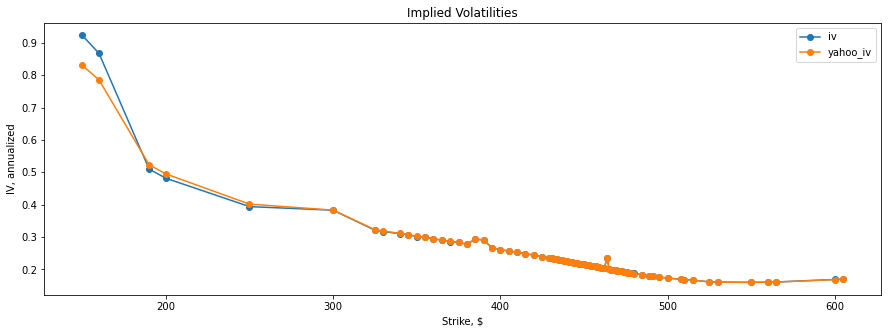

In [47]:
_, ax = plt.subplots(figsize=(15, 5))

print("Mean squared error: {:.5f}".format(np.mean((df["iv"] - df["yahoo_iv"])**2)))

for col in ("iv", "yahoo_iv"):
    ax.plot(df["strike"], df[col], "o-", label=col)
ax.legend()
ax.set_xlabel("Strike, $")
ax.set_ylabel("IV, annualized")
ax.set_title("Implied Volatilities")
plt.show()

**2. Newton Bisection Hybrid (Newt-Safe) (30 extra points)**

Implement the root finding algorithm as in https://www.youtube.com/watch?v=FD3BPTMGJds. Comment on the results and compare them with previous. 

In [48]:
#YOUR CODE HERE